---

# Linear Regression with Scikit-learn

---

-- For more information on this code, watch the video lecture(s) --

In this notebook we will explore linear regression using Scikit-learn, a popular machine learning library. This time we will be using a real dataset that we will explore and analyze.

Main Sections:
1. Linear Regression
2. Polynomial Regression
3. Removing Outliers

#### Imports and Setup

In [6]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

In [7]:
# Optionally mount Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---

## 1. Data Exploration and Analysis 

---

#### Loading the Dataset

In [8]:
# Dataset from Kaggle: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview
# We are only using the training dataset from Kaggle

cols = ['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 
        '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'YrSold', 'SalePrice']

file_path = '../content/drive/MyDrive/Udemy/Machine Learning Basics/datasets/housing_data.csv' # Change this if needed
data = pd.read_csv(file_path, usecols=cols)
print("data shape:", data.shape)

data shape: (1460, 10)


#### Drop Missing Values

In real life data someties there may be missing data points. There are many ways to deal with missing data values. One of the easiest is to simply delete any samples with missing values from the dataset effectivly ignoring any incomplete samples in the dataset.

In [9]:
data.dropna(inplace=True)
print("data shape:", data.shape)

data shape: (1201, 10)


Now let's look at the first 10 entries of our data.

In [10]:
data.head(10)

,LotFrontage,LotArea,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,YrSold,SalePrice
0,65.0,8450,7,2003,856,856,854,1710,2008,208500
1,80.0,9600,6,1976,1262,1262,0,1262,2007,181500
2,68.0,11250,7,2001,920,920,866,1786,2008,223500
3,60.0,9550,7,1915,756,961,756,1717,2006,140000
4,84.0,14260,8,2000,1145,1145,1053,2198,2008,250000
5,85.0,14115,5,1993,796,796,566,1362,2009,143000
6,75.0,10084,8,2004,1686,1694,0,1694,2007,307000
8,51.0,6120,7,1931,952,1022,752,1774,2008,129900
9,50.0,7420,5,1939,991,1077,0,1077,2008,118000
10,70.0,11200,5,1965,1040,1040,0,1040,2008,129500


It would be nice if we could get a statistical summary of each feature. Thankfuly pandas makes this a breeze!

In [11]:
data.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,YrSold,SalePrice
count,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000
mean,70.049958,9951.698585,6.122398,1970.580350,1059.384679,1158.437968,346.073272,1511.132390,2007.802664,180770.480433
std,24.284752,7924.353975,1.419216,31.750335,448.307125,386.257235,435.143451,529.928171,1.330486,83389.519866
min,21.000000,1300.000000,1.000000,1872.000000,0.000000,334.000000,0.000000,334.000000,2006.000000,34900.000000
25%,59.000000,7420.000000,5.000000,1950.000000,784.000000,876.000000,0.000000,1134.000000,2007.000000,127500.000000
50%,69.000000,9262.000000,6.000000,1972.000000,990.000000,1082.000000,0.000000,1456.000000,2008.000000,159500.000000
75%,80.000000,11249.000000,7.000000,2003.000000,1309.000000,1383.000000,728.000000,1768.000000,2009.000000,213500.000000
max,313.000000,215245.000000,10.000000,2010.000000,6110.000000,4692.000000,2065.000000,5642.000000,2010.000000,755000.000000


What do the distributions of each feature look like?

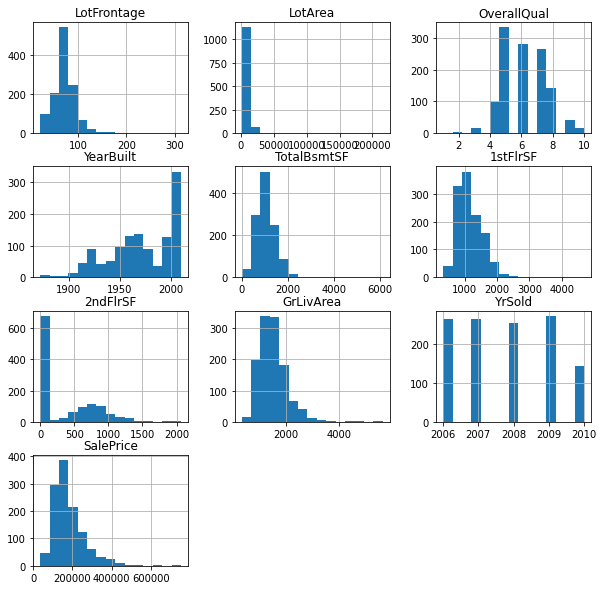

In [12]:
hist = data.hist(figsize=(10,10), bins=15)

Plot each pair of features against each other.

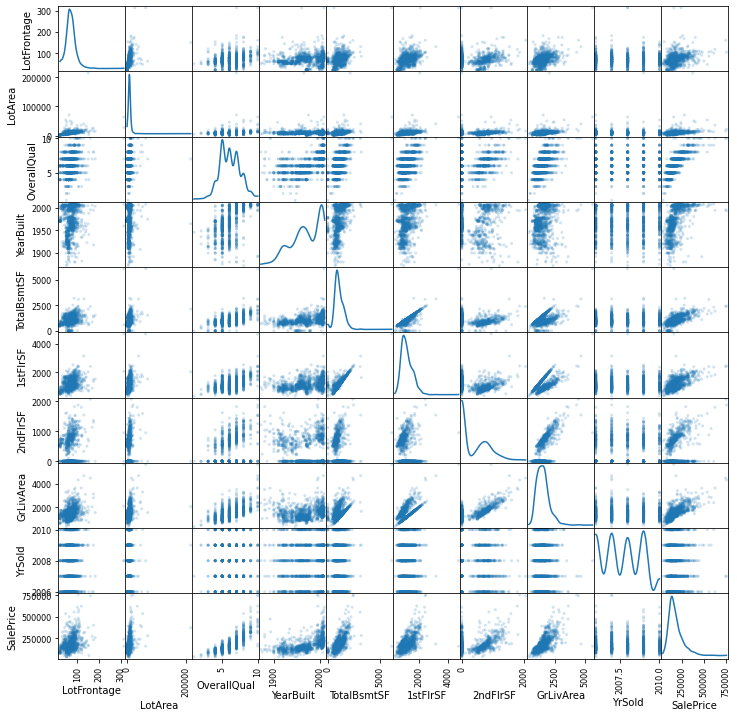

In [33]:
scat_mat = pd.plotting.scatter_matrix(data, alpha=0.2, figsize=(12, 12), diagonal="kde")

Plot a corelation matrix.

Note that `df.corr()` will compute the correlation matrix for a pandas dataframe. By default, the Pearson correlation coefficient will be computed.

The Pearson correlation coefficient, $r$, between to datasets $x$ and $y$ of length $n$ is computed as follows: 
$$r =\cfrac{\sum (x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum (x_i-\bar{x})^2\sum(y_i-\bar{y})^2}}$$



Text(0.5, 1.0, 'Corelation Matrix')

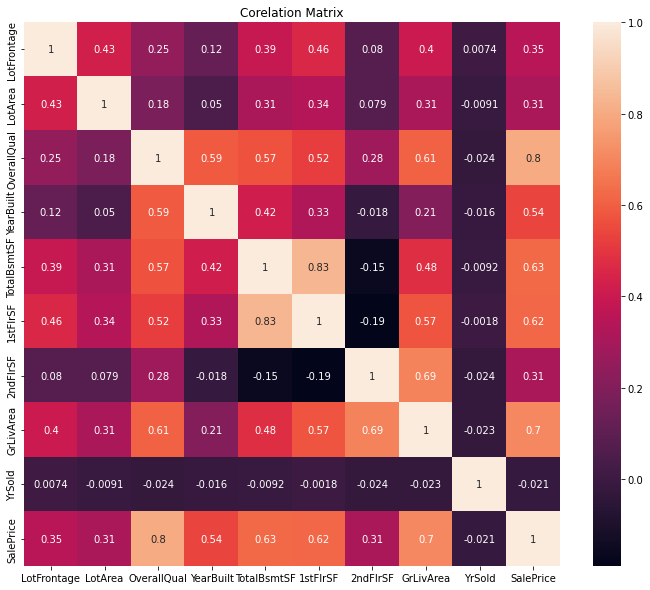

In [14]:
plt.figure(figsize=(12, 10))
corr_map = sns.heatmap(data.corr(), annot=True)
corr_map.set_title('Corelation Matrix')

Box and whisker plots for specified columns.

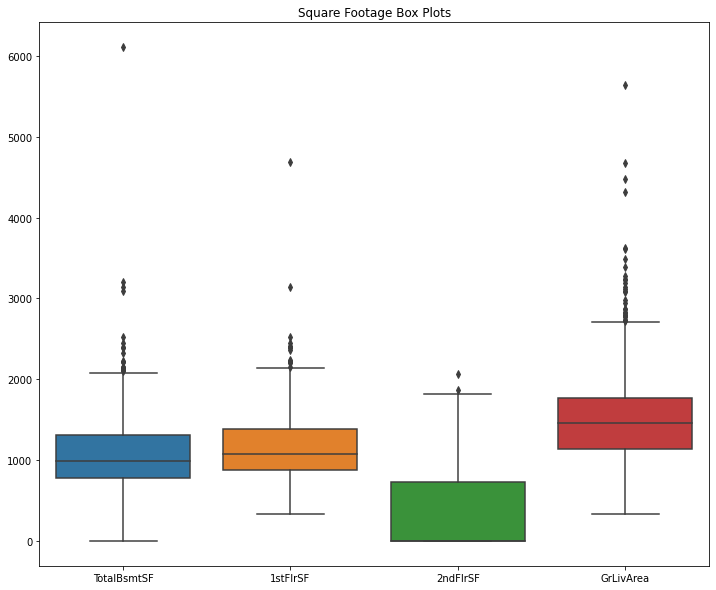

In [15]:
plt.figure(figsize=(12, 10))
plt.title('Square Footage Box Plots')
sns.boxplot(data=data[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea']])

Split the data into training and testing datasets.

In [16]:
X = data.iloc[:,0:-1].values
y = data.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('Training Data Shapes:\n' + 15*'-' + '\n\tX_train:', X_train.shape, '\n\ty_train:', y_train.shape, end='\n\n')
print('Testing Data Shapes:\n' + 15*'-' + '\n\tX_test:', X_test.shape, '\n\ty_test:', y_test.shape)

Training Data Shapes:
---------------
	X_train: (804, 9) 
	y_train: (804,)

Testing Data Shapes:
---------------
	X_test: (397, 9) 
	y_test: (397,)


---

## 2. Linear Regression

---

#### Define and Fit the Linear Regression Model

Creating and fitting/training a linear regression model using Scikit-learn is easy. Just two lines!

- You can even write it in a single line as `linreg = LinearRegression().fit(X_train, y_train)` since the `fit` method returns the `LinearRegression` object instance.

In [17]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Lets take a look at the coefficents of the linear regression model.
coefficents = pd.DataFrame(np.insert(linreg.coef_, 0, linreg.intercept_), columns=['Coefficients'])
coefficents.index = ['w_' + str(i) for i in range(len(coefficents))]
coefficents

,Coefficients
w_0,66537.083762
w_1,98.585917
w_2,1.276499
w_3,23136.175483
w_4,329.224135
w_5,33.066330
w_6,81.229414
w_7,74.480532
w_8,-21.106466
w_9,-407.221021


#### Use Fit model To Make Predicions
Not that we have defined and fit/trained the model, lets use it to make some predictions. We are also going to make predictions on the training dataset so we can compare the training and testing dataset metrics.

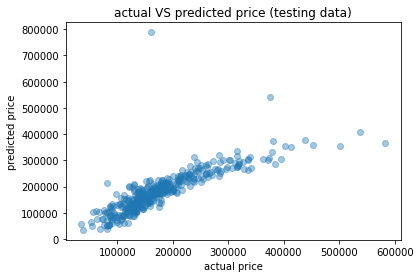

In [18]:
y_pred_train = linreg.predict(X_train)
y_pred = linreg.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.4)
plt.title('actual VS predicted price (testing data)')
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.show()

#### Metrics
Let's compute each of the following metrics for both the testing and training datasets: mean squared error (MSE), mean absolute error (MAE), root mean dquare error (rmse), and $r^2$.

In [19]:
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = mean_squared_error(y_test, y_pred, squared=False)
r2_test = r2_score(y_test, y_pred)

print('Training Data Metrics:\n' + 25*'-')
print('\tMean Squared Error: $%.2f' % mse_train)
print('\tMean Absolute Error: $%.2f' % mae_train)
print('\tRoot Mean Squared Error: $%.2f' % rmse_train)
print('\tr2 Score: %.2f' % r2_train, '\n\n')

print('Testing Data Metrics:\n' + 25*'-')
print('\tMean Squared Error: $%.2f' % mse_test)
print('\tMean Absolute Error: $%.2f' % mae_test)
print('\tRoot Mean Squared Error: $%.2f' % rmse_test)
print('\tr2 Score: %.2f' % r2_test)

Training Data Metrics:
-------------------------
	Mean Squared Error: $1474938188.08
	Mean Absolute Error: $24776.47
	Root Mean Squared Error: $38404.92
	r2 Score: 0.80 


Testing Data Metrics:
-------------------------
	Mean Squared Error: $2170093639.99
	Mean Absolute Error: $26214.25
	Root Mean Squared Error: $46584.26
	r2 Score: 0.66


#### Investigating The Models Predictions Further

We have looked at the classic regression metrics (MSE, MAE, RMSE, and r2). However, for this dataset it may be easiest to make sense of the absolute error since it is the total dollar amount differnce between the models predicted house price and the actual house price.

In [20]:
compare = pd.DataFrame({'actual price':y_test, 'predicted price': np.round(y_pred).astype(int), 
                        'absolute error': np.round(abs(y_test-y_pred)).astype(int)})
compare.head(15)

,actual price,predicted price,absolute error
0,103600,134783,31183
1,213000,240570,27570
2,249700,271524,21824
3,160000,182869,22869
4,221500,244895,23395
5,128000,138032,10032
6,215000,221849,6849
7,178000,216982,38982
8,284000,241162,42838
9,165150,185435,20285


In [21]:
compare[['absolute error']].describe()

,absolute error
count,397.000000
mean,26214.282116
std,38557.130274
min,9.000000
25%,8788.000000
50%,19700.000000
75%,32550.000000
max,628528.000000


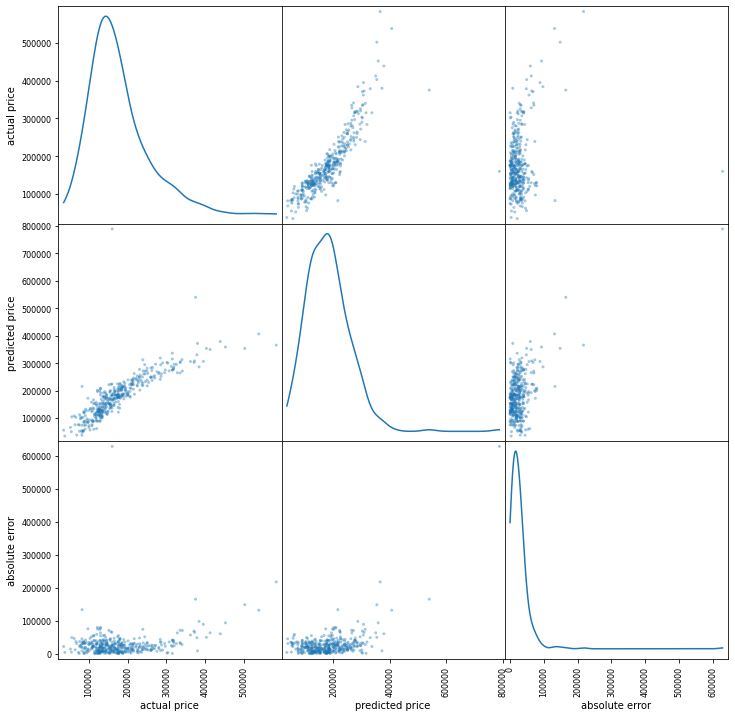

In [22]:
scatter = pd.plotting.scatter_matrix(compare, alpha=0.4, figsize=(12, 12), diagonal="kde")

---

## 3. Polynomial Regression

---

Sk-learn does not provide an explicit polynomial regression model. So, just like with our numpy implimentation, we will create the polynomial features first, then use a standard linear regression model on these new polynomial features.

#### Generate Polynomial Features
Here we generate all the interactions between the features up to a certain degree. Unlike our previous NumPy implimentation, Scikit-learn's PolynomialFeatures class accepts data with multiple features.

In [23]:
degree = 2 # Degree of the polynomial, try using degree 2, then degree 8 and observing the training and testing metrics for each.
poly_feat = PolynomialFeatures(degree, include_bias=False)
X_train_poly = poly_feat.fit_transform(X_train)
X_test_poly = poly_feat.fit_transform(X_test)

print('X_train shape:', X_train.shape)
print('X_train_poly shape:', X_train_poly.shape)

X_train shape: (804, 9)
X_train_poly shape: (804, 54)


###### So whats up with the difference in shape?

In `X_train` there is $804$ samples with $9$ features. Say we create the polynomial features for a degree 2 polynomial. Then we will add an aditional feature for each combination of 2 of the original features. We start with $9$ features, then add each combination of two features (an aditional ${9 \choose 2} = 36$), then each feature squared (an aditional $9$). Thus in `x_tain_poly` there will be have 804 samples with a total $2(9) + 36 = 54$ features.

In general, to generate the polynomial features for degree $d$ with $n$ features we have $$ p_{size}(n, d) = {n+d \choose d} = \cfrac{(n+d)!}{d!\cdot n!} .$$ So the size of the features will grow very fast if either $n$ or $d$ increases.

#### Define and Fit the Polynomial Regression Model

This will be the exact same as for standard linear regression but the model will be fit on the `X_train_poly` features instead.

In [24]:
polyreg = LinearRegression()
polyreg.fit(X_train_poly, y_train)

LinearRegression()

#### Use Fit model To Make Predicions
Not that we have defined and fit/trained the model, lets use it to make some predictions. We are also going to make predictions on the training dataset so we can compare the training and testing dataset metrics.

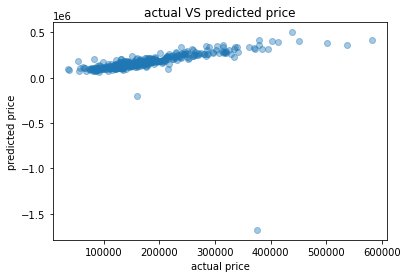

In [25]:
y_pred_train_poly = polyreg.predict(X_train_poly)
y_pred_poly = polyreg.predict(X_test_poly)

plt.scatter(y_test, y_pred_poly, alpha=0.4)
plt.title('actual VS predicted price')
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.show()

#### Metrics

In [26]:
mse_train_poly = mean_squared_error(y_train, y_pred_train_poly)
mae_train_poly = mean_absolute_error(y_train, y_pred_train_poly)
rmse_train_poly = mean_squared_error(y_train, y_pred_train_poly, squared=False)
r2_train_poly = r2_score(y_train, y_pred_train_poly)

mse_test_poly = mean_squared_error(y_test, y_pred_poly)
mae_test_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_test_poly = mean_squared_error(y_test, y_pred_poly, squared=False)
r2_test_poly = r2_score(y_test, y_pred_poly)

print('Training Data Metrics:\n' + 25*'-')
print('\tMean Squared Error: $%.2f' % mse_train_poly)
print('\tMean Absolute Error: $%.2f' % mae_train_poly)
print('\tRoot Mean Squared Error: $%.2f' % rmse_train_poly)
print('\tr2 Score: %.2f' % r2_train_poly, '\n\n')

print('Testing Data Metrics:\n' + 25*'-')
print('\tMean Squared Error: $%.2f' % mse_test_poly)
print('\tMean Absolute Error: $%.2f' % mae_test_poly)
print('\tRoot Mean Squared Error: $%.2f' % rmse_test_poly)
print('\tr2 Score: %.2f' % r2_test_poly)

Training Data Metrics:
-------------------------
	Mean Squared Error: $855648374.29
	Mean Absolute Error: $20020.61
	Root Mean Squared Error: $29251.47
	r2 Score: 0.88 


Testing Data Metrics:
-------------------------
	Mean Squared Error: $11972242691.61
	Mean Absolute Error: $28370.19
	Root Mean Squared Error: $109417.74
	r2 Score: -0.90


#### Investigating The Models Predictions Further

We have looked at the classic regression metrics (MSE, MAE, RMSE, and r2). However, for this dataset it may be easiest to make sense of the absolute error since it is the total dollar amount differnce between the models predicted house price and the actual house price.

In [35]:
compare_poly = pd.DataFrame({'actual price':y_test, 
                             'predicted price': np.round(y_pred_poly).astype(int), 
                             'absolute error': np.round(abs(y_test-y_pred_poly)).astype(int)})
compare_poly.head(15)

,actual price,predicted price,absolute error
0,103600,123401,19801
1,213000,235328,22328
2,249700,275109,25409
3,160000,139814,20186
4,221500,241472,19972
5,128000,142922,14922
6,215000,92553,122447
7,178000,168592,9408
8,284000,241853,42147
9,165150,175747,10597


In [36]:
compare_poly[['absolute error']].describe()

,absolute error
count,3.970000e+02
mean,2.837018e+04
std,1.058092e+05
min,8.000000e+01
25%,7.600000e+03
50%,1.698100e+04
75%,2.863900e+04
max,2.053989e+06


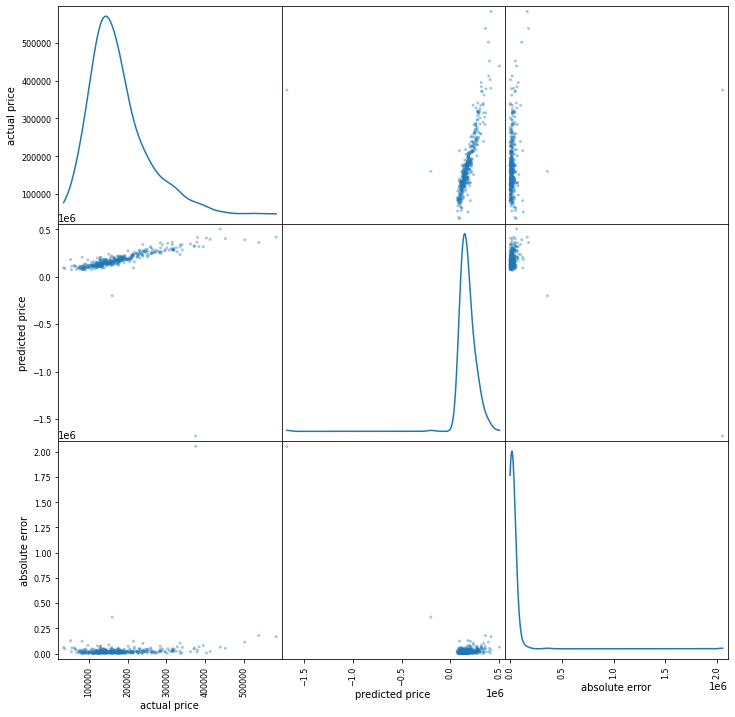

In [37]:
scatter = pd.plotting.scatter_matrix(compare_poly, alpha=0.4, figsize=(12, 12), diagonal="kde")

---

## 3. Removing Outliers

---

In [30]:
# Remove all rows from the training data that have at least one column which is
# more than 3 standard deviations away from the mean value for that column.
train_data = pd.DataFrame(np.column_stack((X_train, y_train)))
data_cliped = train_data[(np.abs(stats.zscore(train_data)) < 3).all(axis=1)]

X_cliped = data_cliped.iloc[:,0:-1].values
y_cliped = data_cliped.iloc[:,-1].values

print('Shape before removing outliers:', data.shape)
print('Shape after removing outliers:', data_cliped.shape)

Shape before removing outliers: (1201, 10)
Shape after removing outliers: (768, 10)


#### Polynomial Regression With No Outliers

We will fit another polynomial regression model as before but this time it will be fit on the training data with no outliers. Do you think there will be a difference.

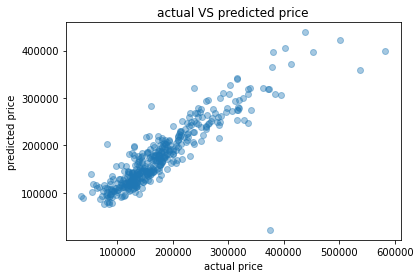

In [31]:
X_poly_cliped = poly_feat.fit_transform(X_cliped)
polyreg_cliped = LinearRegression().fit(X_poly_cliped, y_cliped)
y_pred_poly_cliped = polyreg_cliped.predict(X_test_poly)

plt.scatter(y_test, y_pred_poly_cliped, alpha=0.4)
plt.title('actual VS predicted price')
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.show()

In [32]:
compare_poly_cliped = pd.DataFrame({'actual price':y_test, 
                             'predicted price': np.round(y_pred_poly_cliped).astype(int), 
                             'absolute error': np.round(abs(y_test-y_pred_poly_cliped)).astype(int)})
compare_poly_cliped[['absolute error']].describe()

,absolute error
count,397.000000
mean,21824.826196
std,27417.552384
min,76.000000
25%,7407.000000
50%,15632.000000
75%,27426.000000
max,353479.000000
